In [1]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import random
from skimage.io import imread
import sys
src_path = Path.cwd().parent
sys.path.append(src_path.as_posix())
import img_check, img_processing, img_utils

In [2]:
# Check image data from sample_data
data_root_path = Path(src_path, "sample_data")
ic = img_check.ImgCheck(data_root_path)
imgs_dict = ic.rec_random_pick_imgs(data_root_path)

Show image is /Users/yusei/GitHub/DataAnalysisTool/ImageRecognition/sample_data/other/DSC_0171.JPG


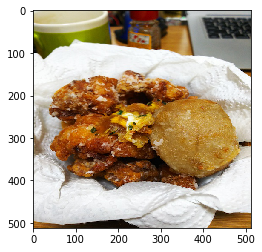

Show image is /Users/yusei/GitHub/DataAnalysisTool/ImageRecognition/sample_data/pasta/DSC_0029.JPG


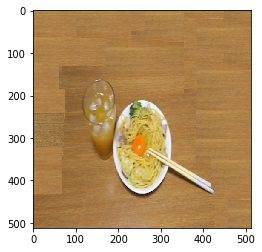

In [3]:
for img_key, img_val in imgs_dict.items():
    print("Show image is {}".format(img_key))
    plt.imshow(img_val)
    plt.show()
#     plt.imshow(img_processing.tmp_righting_img(img_val, 0.9))
#     plt.show()

In [4]:
img_anno_dicts = ic.rec_random_pick_annotations(anno_ext=".xml")
print(img_anno_dicts)

{'img_anno0': {'img_path': PosixPath('/Users/yusei/GitHub/DataAnalysisTool/ImageRecognition/sample_data/other/IMG_-geb8zw.jpg'), 'anno_path': PosixPath('/Users/yusei/GitHub/DataAnalysisTool/ImageRecognition/sample_data/other_annotations/IMG_-geb8zw.xml')}, 'img_anno1': {'img_path': PosixPath('/Users/yusei/GitHub/DataAnalysisTool/ImageRecognition/sample_data/pasta/IMG_fnn4px.jpg'), 'anno_path': PosixPath('/Users/yusei/GitHub/DataAnalysisTool/ImageRecognition/sample_data/pasta_annotations/IMG_fnn4px.xml')}}


In [5]:
train_list = [img_key for img_key in list(img_anno_dicts.keys())]
img_anno = img_anno_dicts[random.choice(train_list)]
img_path = img_anno["img_path"]
img = imread(img_path)
anno_path = img_anno["anno_path"]
print(anno_path)
xml_data = img_utils.fetch_xml_data(anno_path)
xml_root = xml_data.getroot()
print(xml_root.getchildren()[0])

result = []
for xml_child in xml_root:
    anno_dict = {}
    box_dict = {}
    for child in xml_child:
        if child.tag == "bndbox":
            for c in child:
                box_dict[c.tag] = int(c.text)
    category_name = xml_child.findtext("name")
    if category_name:
        anno_dict["category"] = category_name
        anno_dict["box2d"] = box_dict
        result.append(anno_dict)
print(result)

/Users/yusei/GitHub/DataAnalysisTool/ImageRecognition/sample_data/pasta_annotations/IMG_fnn4px.xml
<Element 'folder' at 0x1213950e8>
[{'category': 'pasta', 'box2d': {'xmin': 162, 'ymin': 130, 'xmax': 439, 'ymax': 428}}, {'category': 'drink', 'box2d': {'xmin': 1, 'ymin': 3, 'xmax': 161, 'ymax': 221}}]


In [6]:
result = []
for obj in xml_root.findall('object'):
    anno_dict= {}
    box_dict={}
    for bndbox in obj.findall('bndbox'):
        for pos in bndbox:
            box_dict[pos.tag] = int(pos.text)
    anno_dict['category'] = obj.findtext('name')
    anno_dict['box2d'] = box_dict
    result.append(anno_dict)

print(result)

result = []
for obj in xml_root.findall('object'):
    anno_dict = {}
    anno_dict['category'] = obj.findtext('name')
    anno_dict['box2d'] = {val.tag: int(val.text) for val in obj.find('bndbox').iter() if val.text.isdecimal()}
    result.append(anno_dict)

print(result)

result = [{'category':obj.findtext('name'), 'box2d':{val.tag: int(val.text) for val in obj.find('bndbox').iter() if val.text.isdecimal()}} for obj in xml_root.findall('object')]
print(result)

[{'category': 'pasta', 'box2d': {'xmin': 162, 'ymin': 130, 'xmax': 439, 'ymax': 428}}, {'category': 'drink', 'box2d': {'xmin': 1, 'ymin': 3, 'xmax': 161, 'ymax': 221}}]
[{'category': 'pasta', 'box2d': {'xmin': 162, 'ymin': 130, 'xmax': 439, 'ymax': 428}}, {'category': 'drink', 'box2d': {'xmin': 1, 'ymin': 3, 'xmax': 161, 'ymax': 221}}]
[{'category': 'pasta', 'box2d': {'xmin': 162, 'ymin': 130, 'xmax': 439, 'ymax': 428}}, {'category': 'drink', 'box2d': {'xmin': 1, 'ymin': 3, 'xmax': 161, 'ymax': 221}}]


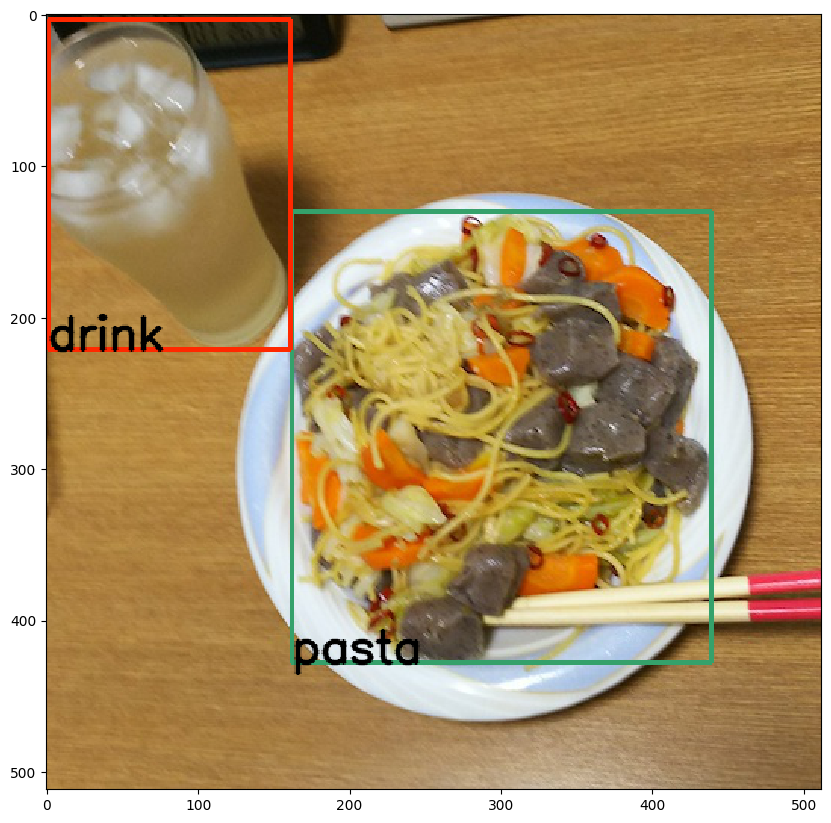

In [7]:
category_clr_dict = img_utils.select_univ_clr(Path(data_root_path, "classes.txt"))

# Show annotations with image
if result:
    for box_dict in result:
        category = box_dict.get('category')
        box2d = box_dict.get('box2d')
        cv2.rectangle(img, pt1=(box2d['xmin'],box2d['ymin']), pt2=(box2d['xmax'],box2d['ymax']), color=category_clr_dict[category], thickness=2)
        cv2.putText(img,category,(box2d['xmin'],box2d['ymax']), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,0),2,cv2.LINE_AA)
    plt.figure(figsize=(10,20), dpi=100)
    plt.imshow(img)
    plt.show()

In [8]:
# def for_loop(n):
#     extension = []
#     for x in range(n):
#         tmp_ext = []
#         for y in range(n):
#             tmp_ext.append(y**2)
#         extension.append(tmp_ext)
#     return extension

# def comprehension(n):
#     return [[y**2 for y in range(n)] for x in range(n)]

In [9]:
# %timeit for_loop(1000)

In [10]:
# %timeit comprehension(1000)